In [1]:
import fastai
from fastai.vision import *

from azureml.core import Workspace, Datastore
import tempfile
import os

import torch

from PIL import Image

In [2]:
torch.cuda.is_available()

True

In [3]:
workspace = Workspace.from_config()

datastore = Datastore.get(workspace, "flowersdata")

In [4]:
path = tempfile.mkdtemp()

In [5]:
datastore.download(path, show_progress=False)

653320

In [6]:
flowers_path = f"{path}/flowers"

In [7]:
print(os.listdir(flowers_path))

['test', 'validation', 'train']


In [8]:
image_dl = ImageDataBunch.from_folder(flowers_path, train="train", valid="validation", test="test", ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
image_dl.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

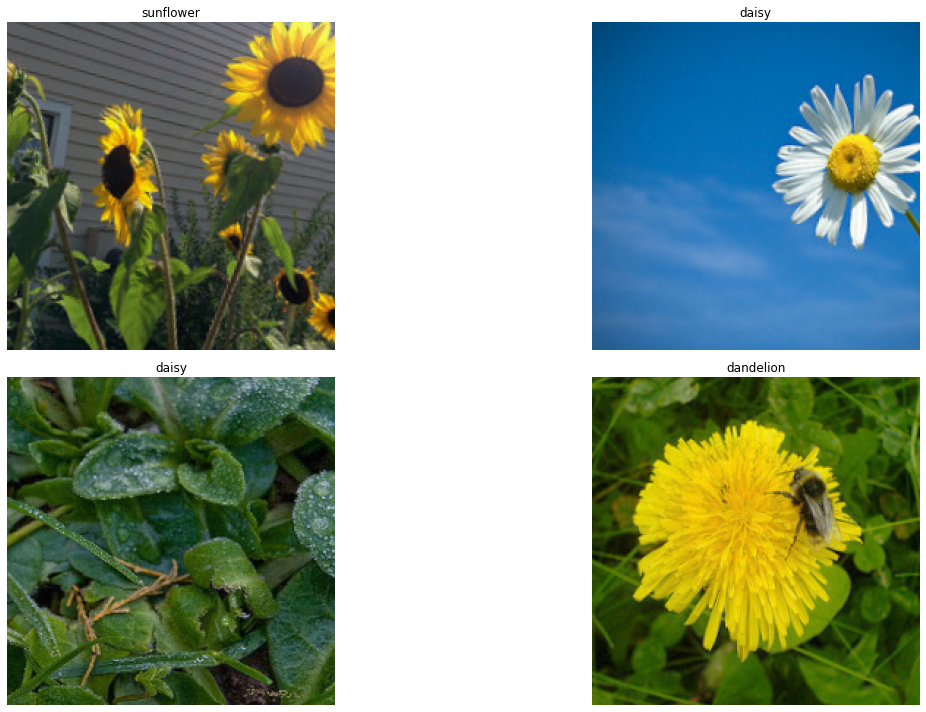

In [10]:
image_dl.show_batch(rows=2, figsize=(20, 10))

In [11]:
learner = cnn_learner(image_dl, models.resnet50, pretrained=True, metrics=error_rate)

In [12]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.736100,0.347553,0.114754,01:10
1,0.495864,0.429081,0.131148,01:03
2,0.324101,0.336618,0.114754,01:04
3,0.236991,0.266984,0.081967,01:04
4,0.175932,0.325205,0.114754,01:05


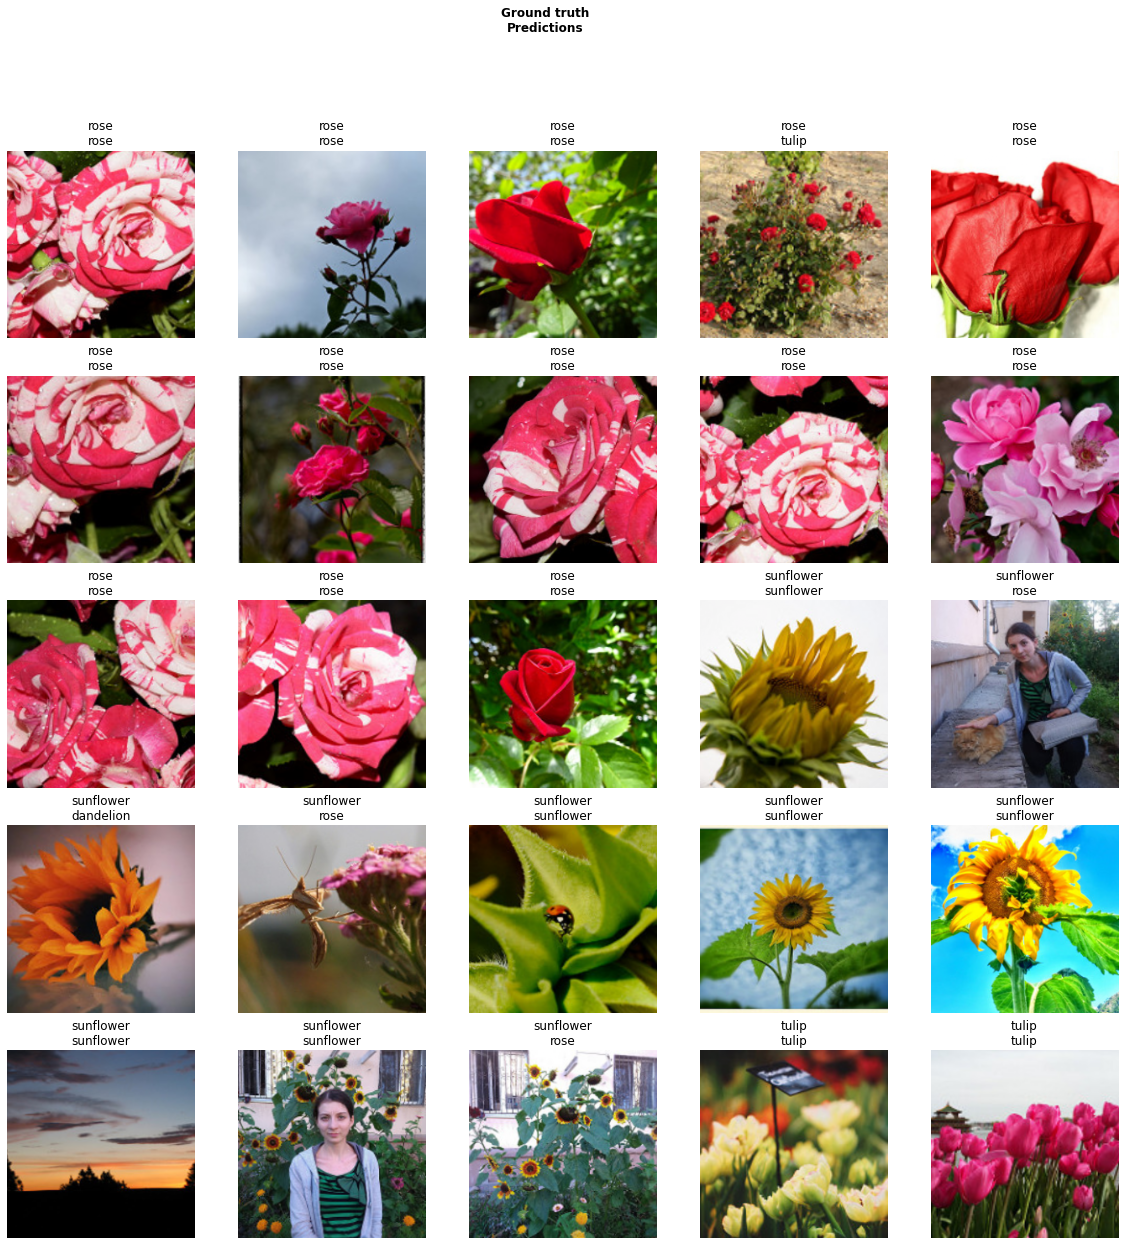

In [15]:
learner.show_results()

In [17]:
tulip_test = f"{path}/flowers/test/tulip/20093649146_5a93a8f173_n.jpg"

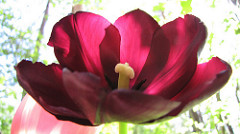

In [18]:
img = open_image(tulip_test)
img

In [19]:
_, ind, _ = learner.predict(img)

image_dl.classes[ind.item()]

'tulip'

In [ ]:
daisy_test = f"{path}/flowers/test/daisy/34531542152_c8ba2e0fea_n.jpg"

img = open_image(daisy_test)

_, ind, _ = learner.predict(img)

image_dl.classes[ind.item()]

In [ ]:
sunflower_test = f"{path}/flowers/test/sunflower/20972862281_5367f4af88.jpg"

img = open_image(sunflower_test)

_, ind, _ = learner.predict(img)

image_dl.classes[ind.item()]

In [ ]:
torch.save(learner.model, "flowers_pytorch.pth")